### The major aim of this notebook is to predict which of the customers will have their loan approved.

##### target variable: Loan_Status

In [24]:
import os 
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [25]:
df1 = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
df2 = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
df1[cat[-1]] = pd.to_numeric(df1[cat[-1]], errors='coerce')

In [26]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
df2.shape

(367, 12)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      0 non-null      float64
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [29]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.000000,614.000000,592.000000,600.00000,564.000000,0.0
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN
min,150.000000,0.000000,9.000000,12.00000,0.000000,NaN
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,NaN


In [30]:
df1.drop('Loan_ID',axis=1,inplace=True)
df2.drop('Loan_ID',axis=1,inplace=True)

In [31]:
df1.isnull().sum().sort_values(ascending=False)

Property_Area        614
Credit_History        50
Self_Employed         32
LoanAmount            22
Dependents            15
Loan_Amount_Term      14
Gender                13
Married                3
Education              0
ApplicantIncome        0
CoapplicantIncome      0
Loan_Status            0
dtype: int64

In [32]:
print("Before filling missing values\n\n","#"*50,"\n")
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']


for col in null_cols:
    print(f"{col}:\n{df1[col].value_counts()}\n","-"*50)
    df1[col] = df1[col].fillna(
    df1[col].dropna().mode().values[0] )   

    
df1.isnull().sum().sort_values(ascending=False)
print("After filling missing values\n\n","#"*50,"\n")
for col in null_cols:
    print(f"\n{col}:\n{df1[col].value_counts()}\n","-"*50)

Before filling missing values

 ################################################## 

Credit_History:
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
 --------------------------------------------------
Self_Employed:
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
 --------------------------------------------------
LoanAmount:
LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64
 --------------------------------------------------
Dependents:
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
 --------------------------------------------------
Gender:
Gender
Male      

### Data visalization

In [33]:
num = df1.select_dtypes('number').columns.to_list()
cat = df1.select_dtypes('object').columns.to_list()

#numeric df
loan_num =  df1[num]
#categoric df
loan_cat = df1[cat]

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


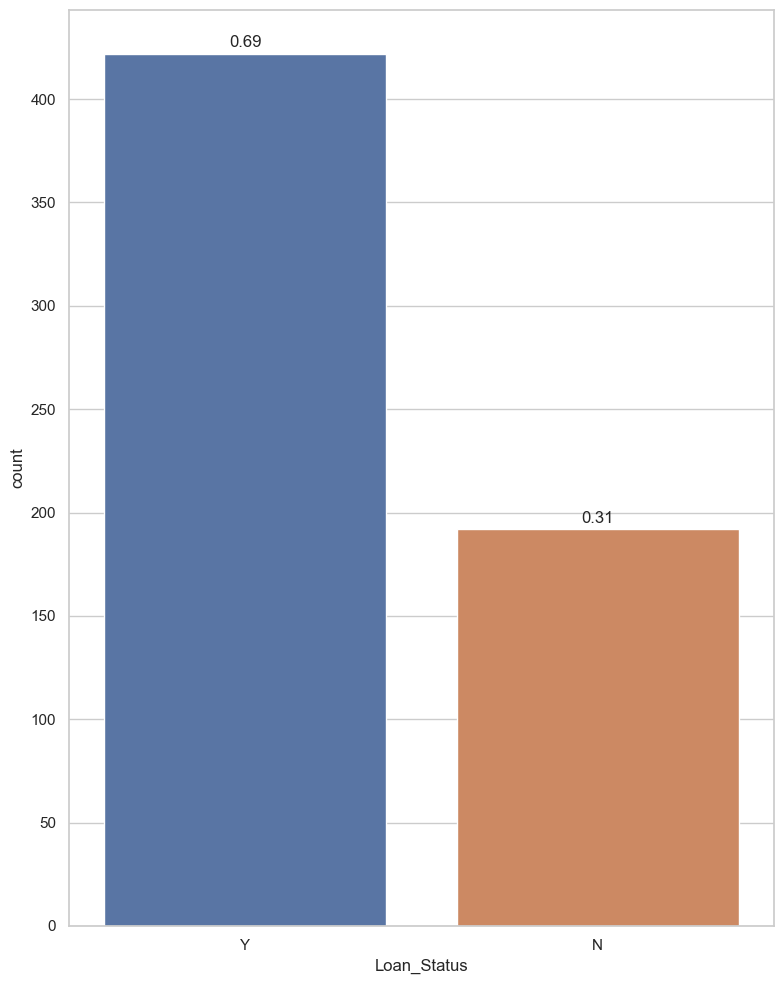

In [35]:
print(df1[cat[-1]].value_counts(normalize=True))
total = float(len(df1[cat[-1]]))
plt.figure(figsize=(8,10))
sns.set(style="whitegrid")
ax = sns.countplot(x=df1[cat[-1]])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,f'{height/total:.2f}',ha="center") 
plt.tight_layout()
plt.show()

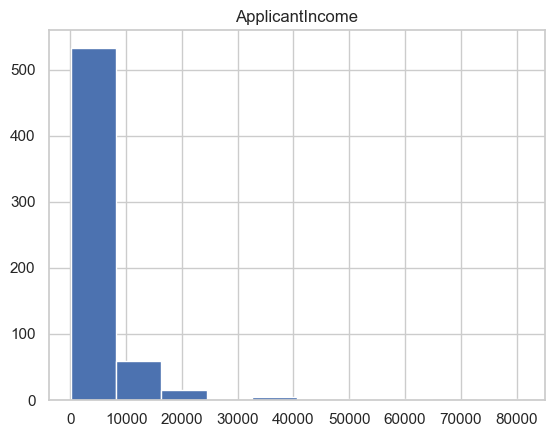

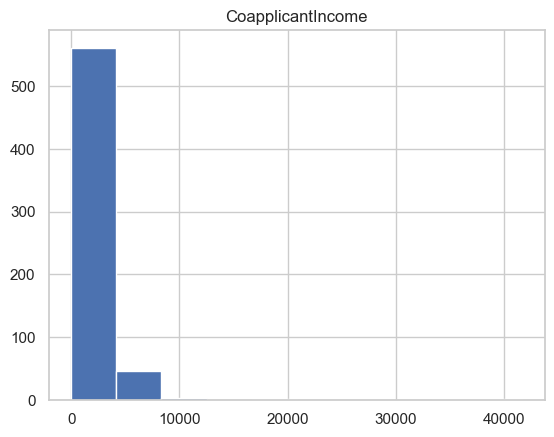

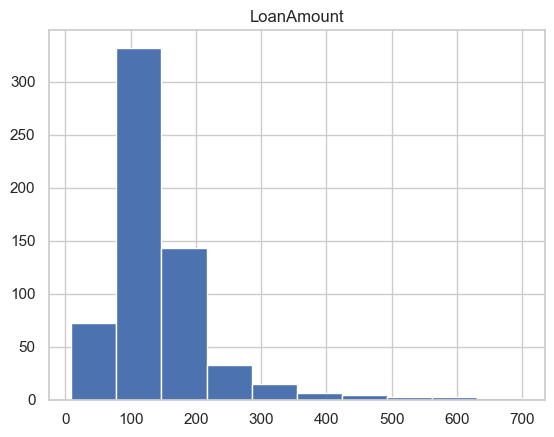

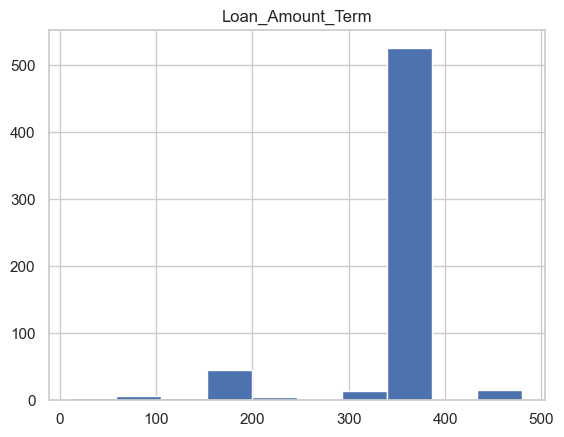

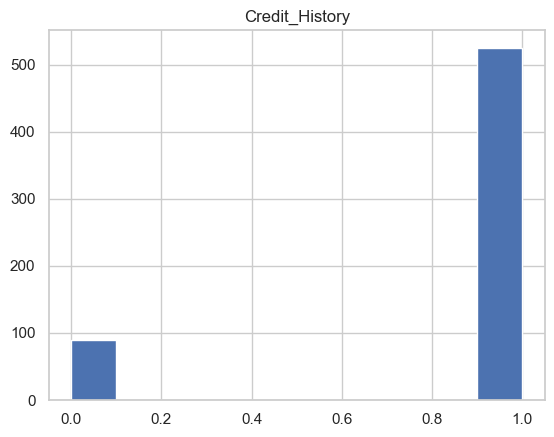

ValueError: autodetected range of [nan, nan] is not finite

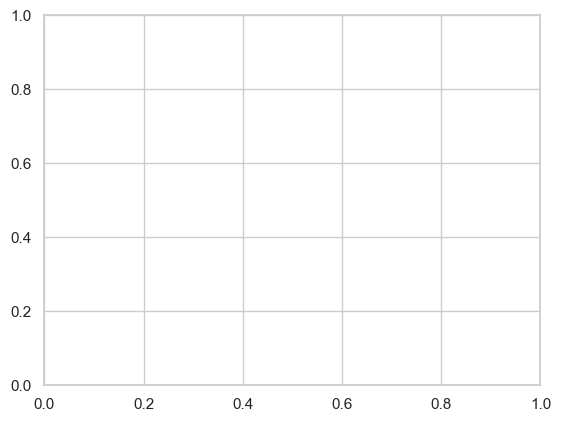

In [36]:
for i in loan_num:
    plt.hist(loan_num[i])
    plt.title(i)
    plt.show()

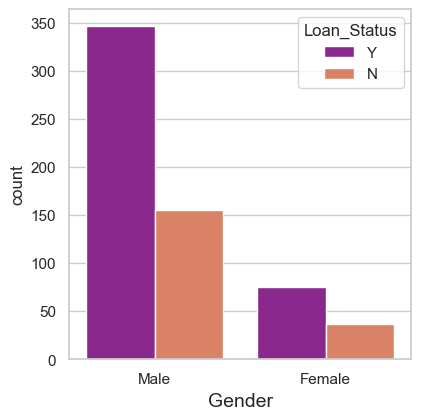

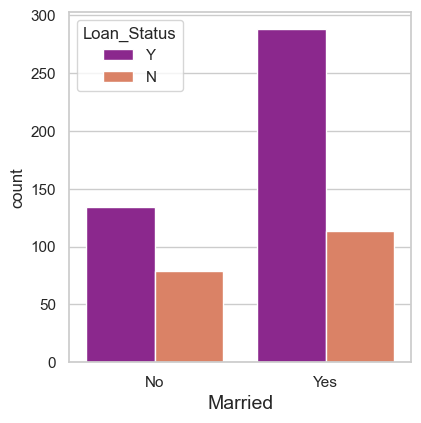

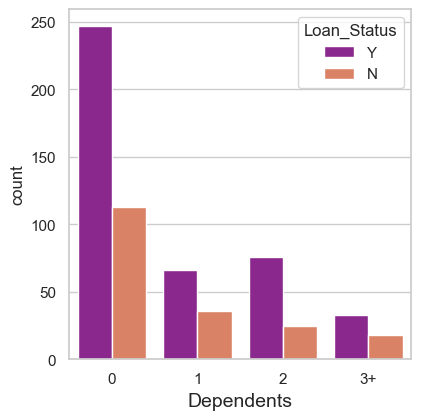

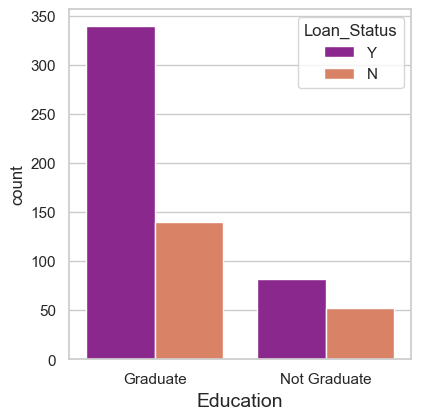

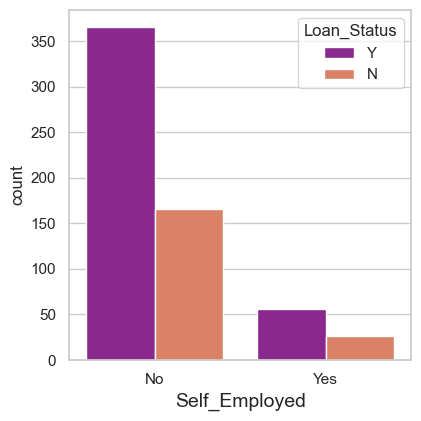

In [38]:
for i in cat[:-1]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=df1 ,palette='plasma')
    plt.xlabel(i, fontsize=14)

### Encoding data to numeric

In [39]:
#converting categorical values to numbers
to_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

# adding the new numeric values from the to_numeric variable to both datasets
df1 = df1.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)
df2 = df2.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

# convertind the Dependents column
Dependents_ = pd.to_numeric(df1.Dependents)
Dependents__ = pd.to_numeric(df2.Dependents)

# dropping the previous Dependents column
df1.drop(['Dependents'], axis = 1, inplace = True)
df2.drop(['Dependents'], axis = 1, inplace = True)

# concatination of the new Dependents column with both datasets
df1 = pd.concat([df1, Dependents_], axis = 1)
df2 = pd.concat([df2, Dependents__], axis = 1)

# checking the our manipulated dataset for validation
print(f"training set (row, col): {df1.shape}\n\ntesting set (row, col): {df2.shape}\n")
print(df1.info(), "\n\n", df2.info())

training set (row, col): (614, 12)

testing set (row, col): (367, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      0 non-null      float64
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 57.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 column

### Correlation matrix

<Axes: >

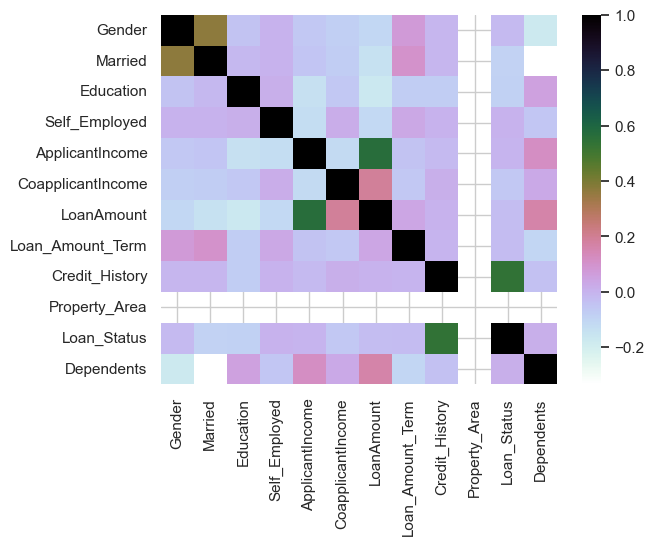

In [40]:
sns.heatmap(df1.corr() ,cmap='cubehelix_r')

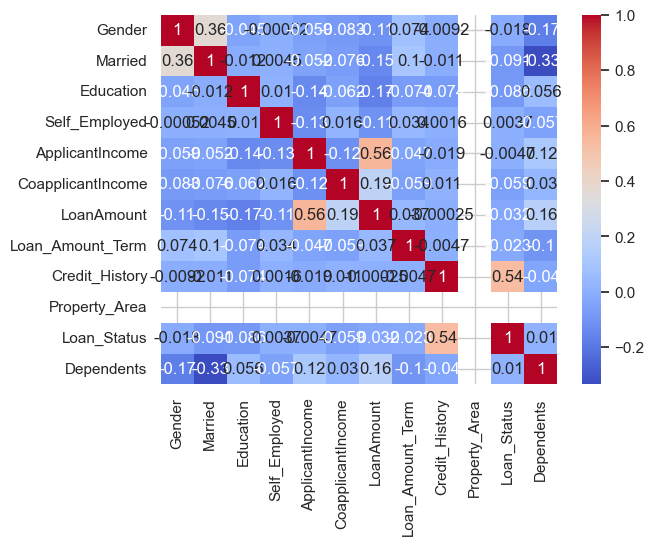

In [45]:
corr = df1.select_dtypes ( ['number']).corr ()
sns.heatmap (corr, cmap='coolwarm', annot=True)
plt.show()

### Machine learning models

In [47]:
y = df1['Loan_Status']
X = df1.drop('Loan_Status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Decision Tree

In [48]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_predict = DT.predict(X_test)
print(classification_report(y_test, y_predict))
DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.61      0.59      0.60        51
           1       0.85      0.86      0.85       134

    accuracy                           0.78       185
   macro avg       0.73      0.72      0.73       185
weighted avg       0.78      0.78      0.78       185

78.38% Accurate


### Random Forest

In [49]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_predict = RF.predict(X_test)
print(classification_report(y_test, y_predict))
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.70      0.45      0.55        51
           1       0.82      0.93      0.87       134

    accuracy                           0.79       185
   macro avg       0.76      0.69      0.71       185
weighted avg       0.78      0.79      0.78       185

79.46% Accurate


### Logistic Regression

In [59]:
X_train = X_train.fillna(0)
X_train = X_train.fillna(X_train.mean())
X_train = X_train.fillna(-1)

In [60]:
X_test = X_test.fillna(0)
X_test = X_test.fillna(X_test.mean())
X_test = X_test.fillna(-1)

In [61]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)
print(classification_report(y_test, y_predict))
LR_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185

accuracy is 0.8324324324324325


### Conclusion

In [67]:
#Credit_History is a very important variable because of its high correlationwith Loan_Status therefor showind high Dependancy for the latter.
#The Logistic Regression algorithm is the most accurate: approximately 83%.

In [68]:
score = [DT_SC,RF_SC,LR_SC]
Models = pd.DataFrame({
    'n_neighbors': ["Decision Tree","Random Forest","Logistic Regression"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,n_neighbors,Score
2,Logistic Regression,0.832432
1,Random Forest,0.794595
0,Decision Tree,0.783784
